This notebook demonstrates how the klimits package can be used to generate robot trajectories without without exceeding limits on the position, velocity, acceleration and jerk of each robot joint.

In [1]:
# First step: install the klimits package via pip
! pip install klimits
%matplotlib inline  # required to generate plots with matplotlib within this notebook 

     |████████████████████████████████| 245kB 5.7MB/s 


UsageError: unrecognized arguments: # required to generate plots with matplotlib within this notebook


In order to generate motions that respect kinematic joint constraints, the klimits package computes at each time step and for each joint the range of safely executable accelerations $[a_{t+1_{min}}, a_{t+1_{max}}]$. 
Given a network prediction $m \in [-1, 1]$, the joint acceleration at the following time step $a_{t+1}$ can be computed as follows:

$a_{t+1} = a_{t+1_{min}} + \frac{1 + m}{2} \cdot \left(a_{t+1_{max}} - a_{t+1_{min}}\right)$

Simply put, the desired acceleration $a_{t+1}$ is linearly interpolated between $a_{t+1_{min}}$ and $a_{t+1_{max}}$.

The prediction $m$ can be generated by a neural network that is trained via reinforcement learning. 
In the following, the constraint satisfaction is demonstrated by computing trajectories using random network predictions $m$. 
Such a random agent corresponds to a neural network at the very beginning of the training phase. 

INFO:root:Calculating trajectory ...
INFO:root:Calculating a trajectory with a duration of 10.0 seconds took 1.057973038 seconds
INFO:root:Joint 1 (min/max) Jerk: -0.9353032102213158 / 0.9492088995051018; Acc: -0.9958758411917447 / 0.9954258150990849; Vel: -0.9372989651769409 / 0.8184052560240773; Pos: -0.9416376999062336 / 0.13304459168565153
INFO:root:Joint 2 (min/max) Jerk: -0.91184309513029 / 0.9657403277467909; Acc: -0.9989825806664783 / 0.9906099952507574; Vel: -0.9855281633596046 / 0.8479576273106038; Pos: -0.999914559943771 / 0.9998102339203891
INFO:root:Joint 3 (min/max) Jerk: -0.8821406527116771 / 0.8751508506835737; Acc: -0.9920238773350905 / 0.9969055604271104; Vel: -0.9561742426535421 / 0.8747357935409354; Pos: -0.999984120364941 / 0.0015666580600945945
INFO:root:Joint 4 (min/max) Jerk: -0.9021041817753618 / 0.8541668048120494; Acc: -0.9998450534289018 / 0.9954811621610709; Vel: -0.9934472104452766 / 0.9709601517521864; Pos: -0.9959048268238585 / 0.999392516904168
INFO:roo

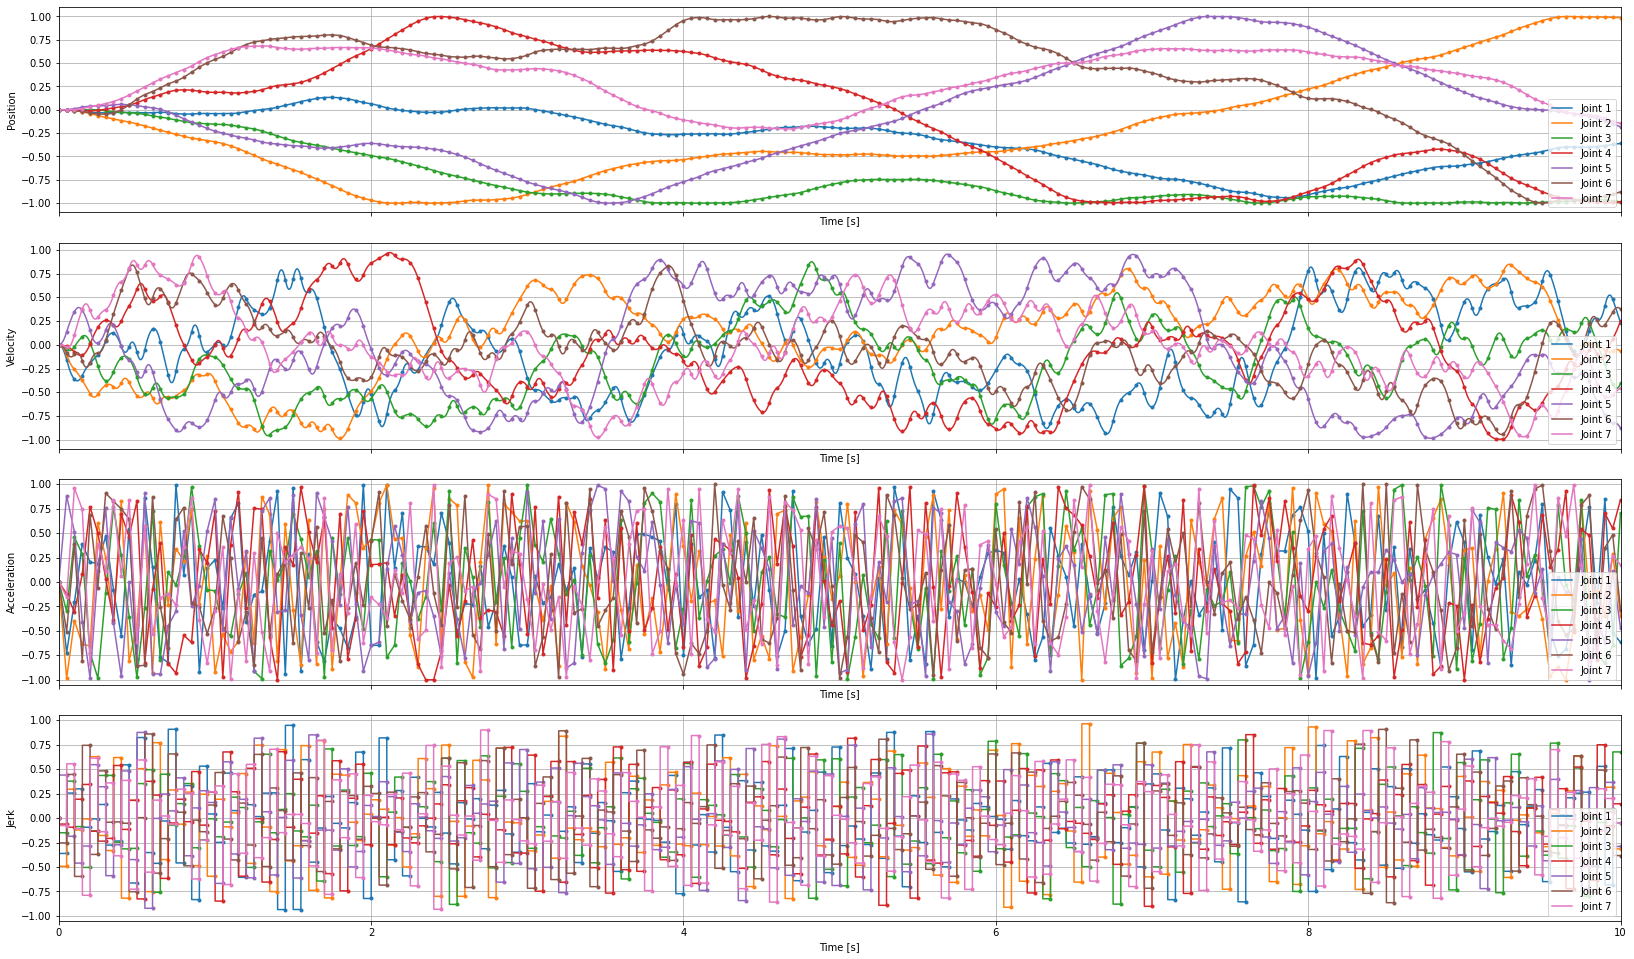

In [3]:
# Generate a random trajectory with a duration of 10 seconds for seven joints with predefined kinematic limits.
# The code below is equivalent to running 'python -m klimits.test_trajectory_generation' in a terminal.
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
%run -G "$test_script" 

Several parameters can be adjusted to modify the generated trajectory. 
In the following example, a trajectory for two joints is computed by specifying position, velocity and acceleration limits via command line arguments. 
The time step between decision steps $\Delta t$ is set to $0.1 s$. <br>
The maximum jerk  $j_{max}$ is computed as
$j_{max} = \frac{a_{max} - a_{min}}{\Delta t}$. <br>

If specified, the joint limits are mutiplied with pos_limit_factor, vel_limit_factor, acc_limit_factor and jerk_limit_factor $\in (0, 1.0]$ before computing the trajectory. 

Note that the range of safe accelerations is visualized with dashed lines. 

INFO:root:Calculating trajectory ...
INFO:root:Calculating a trajectory with a duration of 5.0 seconds took 0.14752840300025127 seconds
INFO:root:Joint 1 (min/max) Jerk: -0.9908111352233441 / 0.9915116517853431; Acc: -0.9906658758261693 / 0.9363475858225061; Vel: -0.9415934241327653 / 0.929831373066613; Pos: -0.10236121204427884 / 0.5268271014940196
INFO:root:Joint 2 (min/max) Jerk: -0.8955344256135911 / 0.9984706731813338; Acc: -0.9336618268819302 / 0.9760174096055956; Vel: -0.41485045261659015 / 0.9333713327148012; Pos: 0.0 / 0.9980355868696607


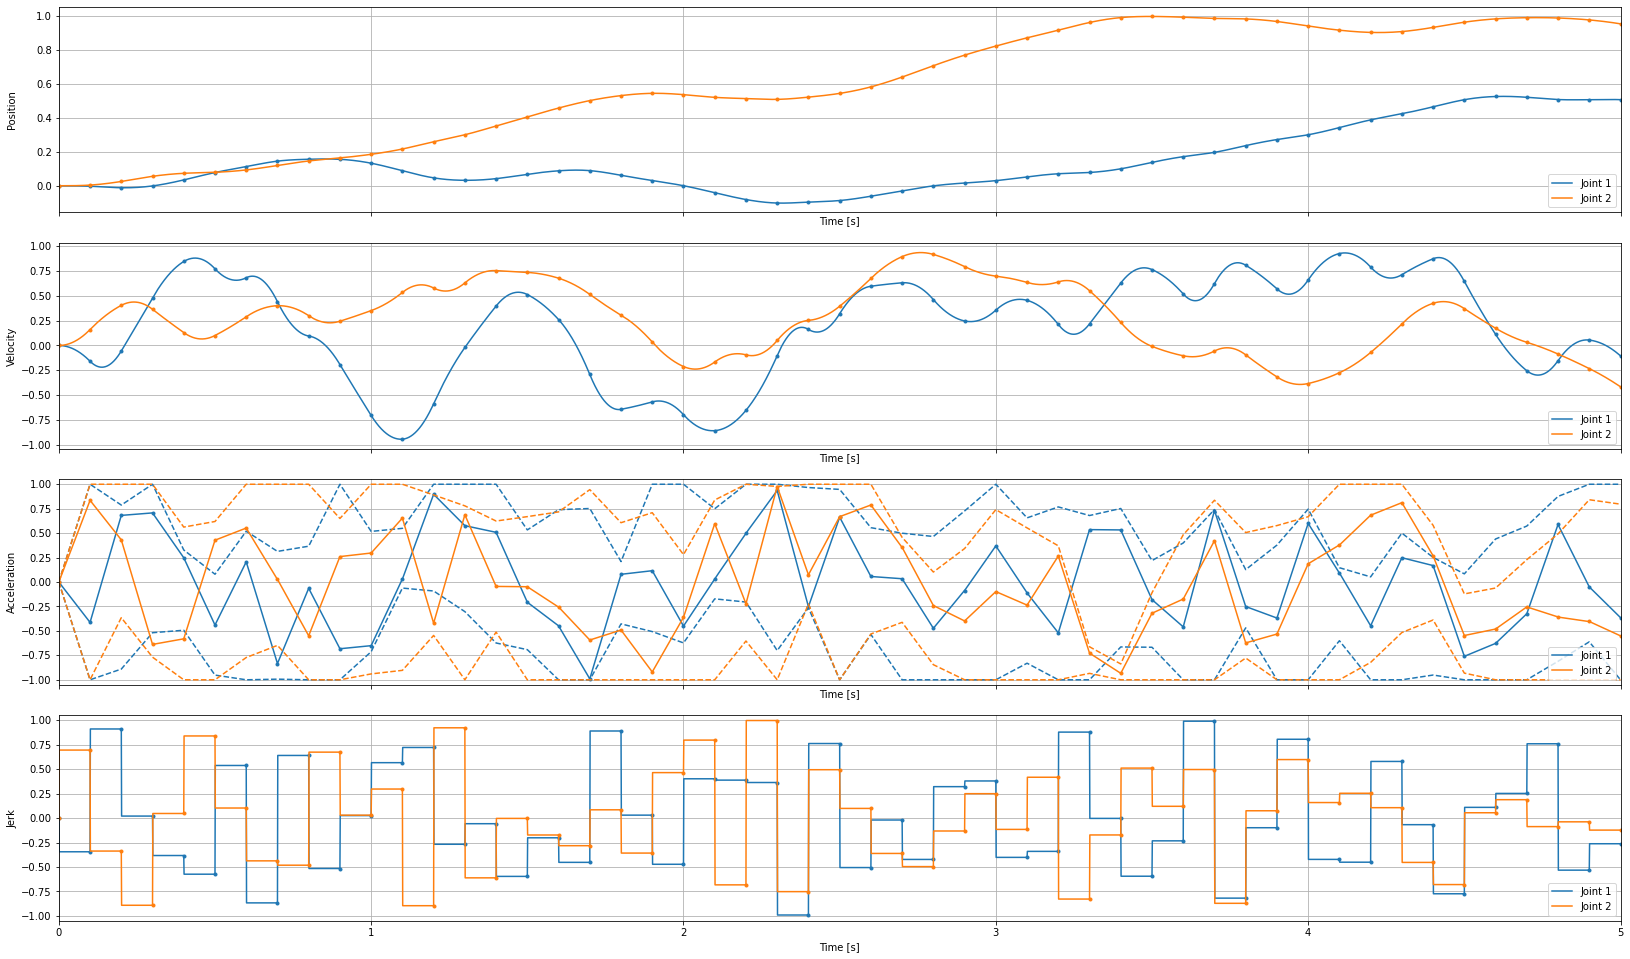

In [14]:
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
%run -G "$test_script" --time_step=0.1 --pos_limits='[[-2.96705972839, 2.96705972839], [-2.09439510239, 2.09439510239]]' --vel_limits='[[-1.71042266695, 1.71042266695], [-1.71042266695, 1.71042266695]]' --acc_limits='[[-15, 15], [-7.5, 7.5]]' --plot_joint='[1, 1]' --pos_limit_factor=0.9 --vel_limit_factor=0.8 --acc_limit_factor=0.7 --jerk_limit_factor=0.6 --trajectory_duration=5 --plot_safe_acc_limits 

It is also possible to use a constant network prediction $m$ rather than random predictions by passing the '--constant_action' argument. <br>
By setting $m = 1.0$, a time-optimal trajectory for reaching the maximum position $p_{max}$ is calculated. 

INFO:root:Calculating trajectory ...
INFO:root:Calculating a trajectory with a duration of 5.0 seconds took 0.1393786970002111 seconds
INFO:root:Joint 1 (min/max) Jerk: -0.6967708416646957 / 1.0; Acc: -0.9864306974326 / 1.0; Vel: -0.0013414135525220416 / 1.0; Pos: 0.0 / 1.0000000000000004
INFO:root:Joint 2 (min/max) Jerk: -1.0 / 1.0; Acc: -1.0 / 1.0; Vel: -0.16435741785687097 / 0.9999999999977145; Pos: 0.0 / 1.0000000000000004


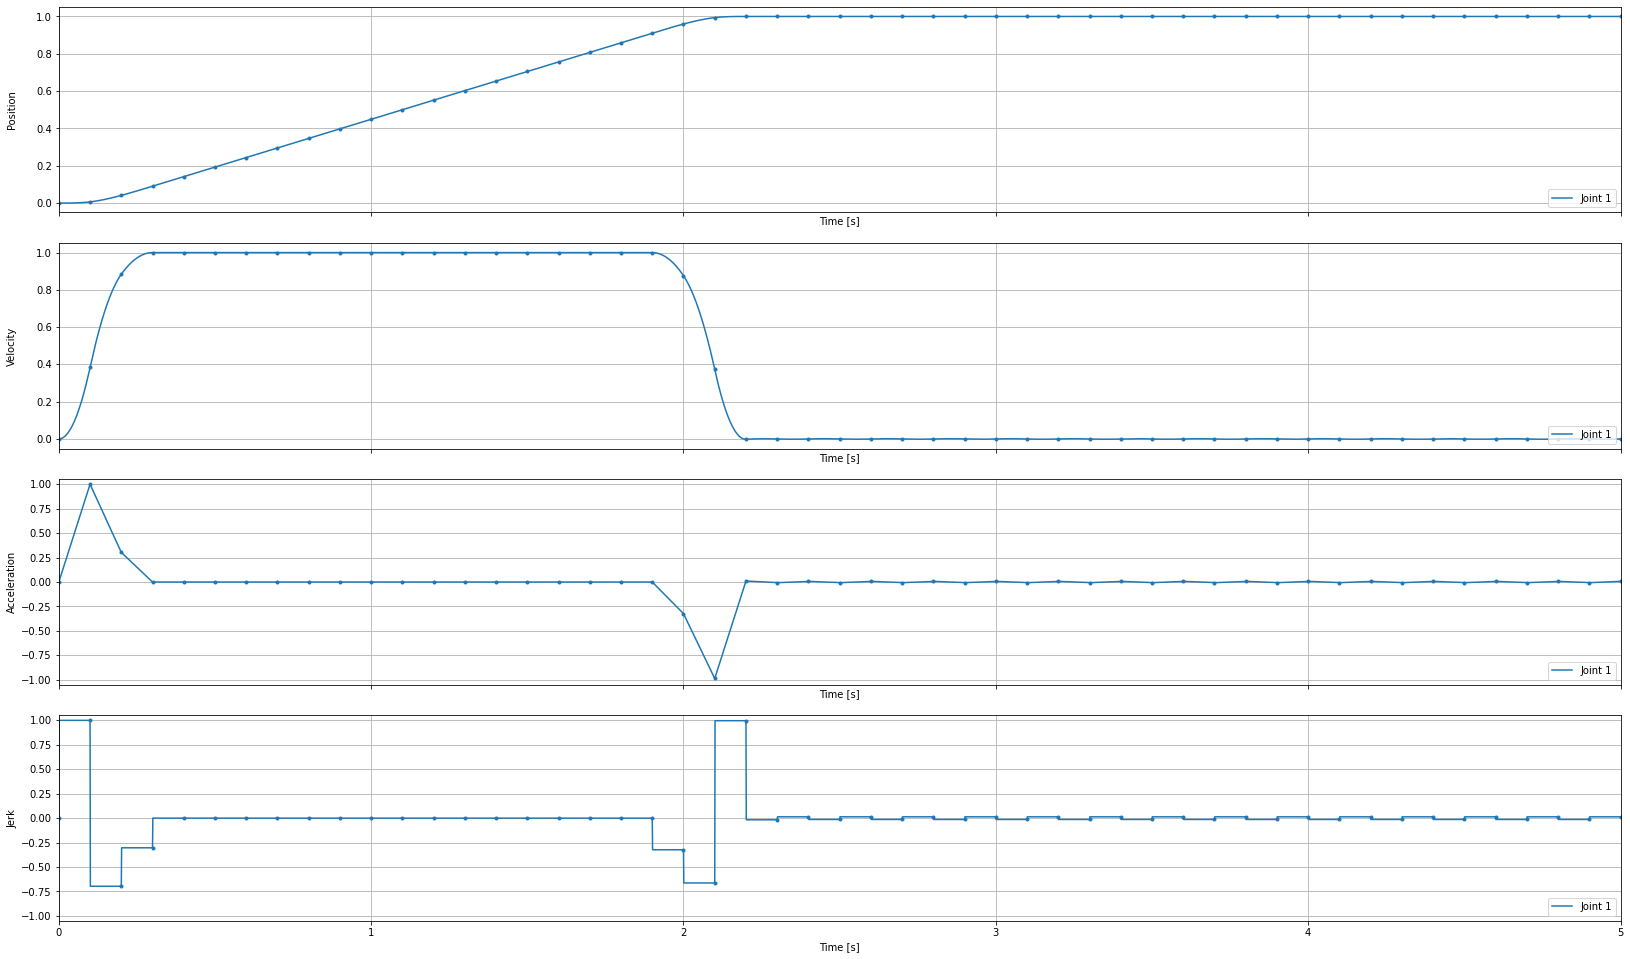

In [12]:
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
%run -G "$test_script" --time_step=0.1 --pos_limits='[[-2.96705972839, 2.96705972839], [-2.09439510239, 2.09439510239]]' --vel_limits='[[-1.71042266695, 1.71042266695], [-1.71042266695, 1.71042266695]]' --acc_limits='[[-15, 15], [-7.5, 7.5]]' --plot_joint='[1, 0]' --pos_limit_factor=0.9 --vel_limit_factor=0.8 --acc_limit_factor=0.7 --jerk_limit_factor=0.5 --trajectory_duration=5 --constant_action=1.0

Analogously, a constant network prediction $m = -1$ leads to a time-optimal trajectory for reaching $p_{min}$. This way, the package can also be used to calculate time-optimal trajectories to a certain target position. 

INFO:root:Calculating trajectory ...
INFO:root:Calculating a trajectory with a duration of 5.0 seconds took 0.13515457200082892 seconds
INFO:root:Joint 1 (min/max) Jerk: -1.0 / 0.6967708416646956; Acc: -1.0 / 0.986430697430531; Vel: -1.0 / 0.0013414135527314297; Pos: -1.0000000000000002 / 0.0
INFO:root:Joint 2 (min/max) Jerk: -1.0 / 0.9999999999999951; Acc: -1.0 / 1.0; Vel: -0.9999999999977145 / 0.16435741785747782; Pos: -1.0000000000000002 / 0.0


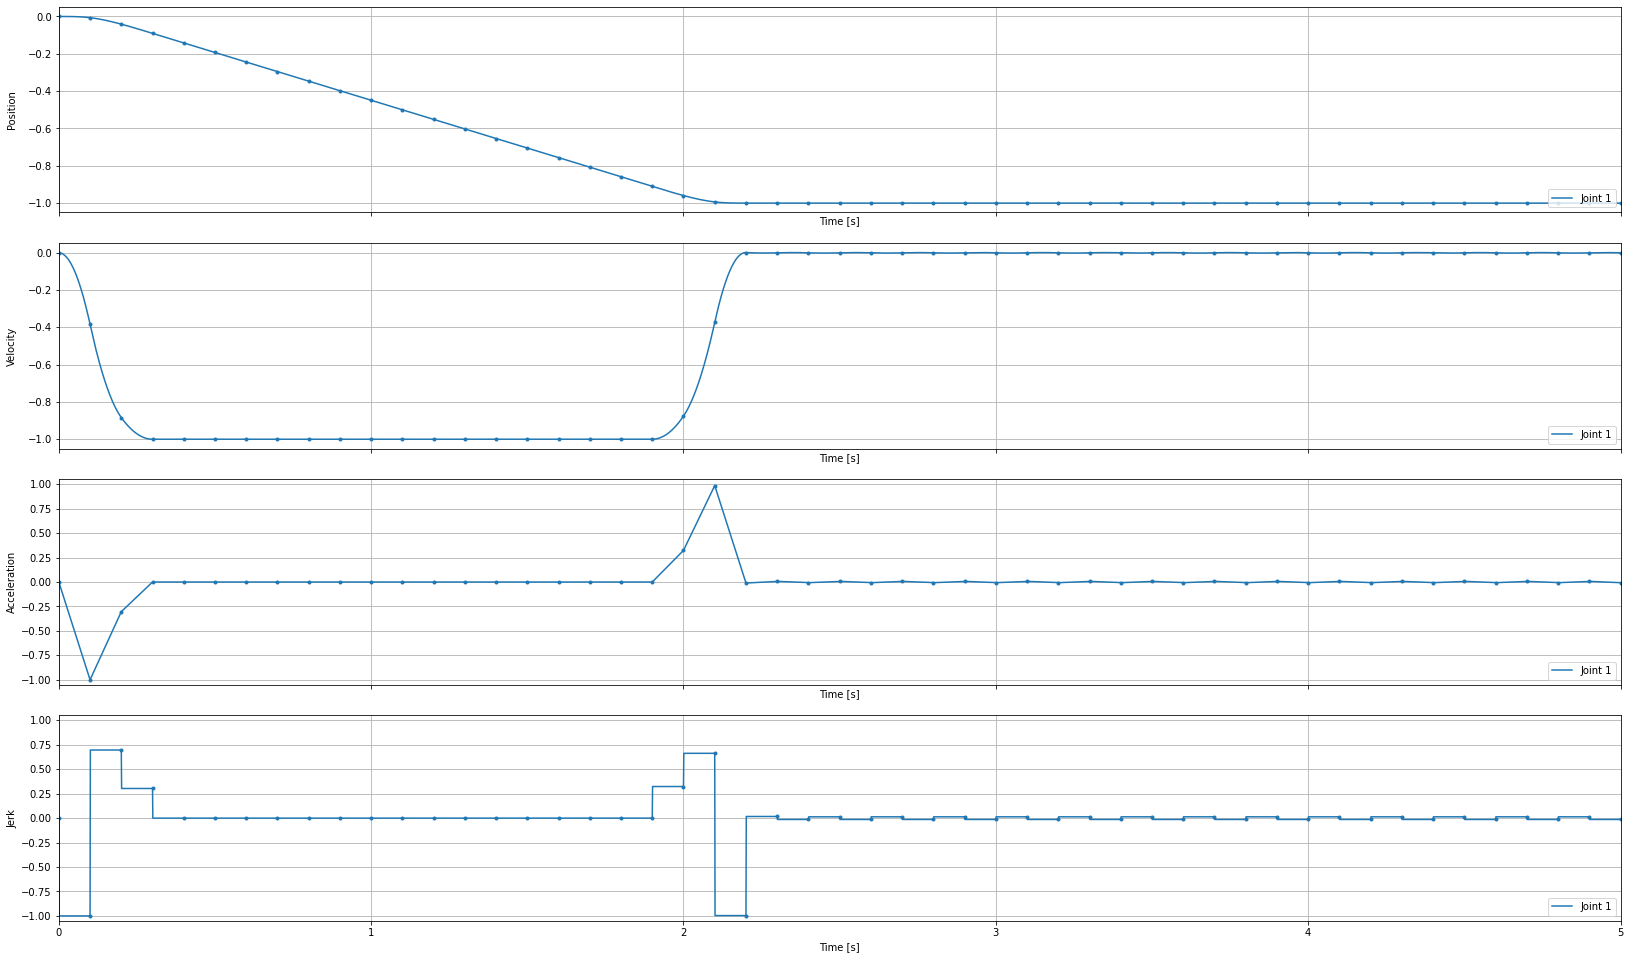

In [11]:
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
import klimits, os
test_script = os.path.join(os.path.dirname(klimits.__file__), "test_trajectory_generation.py")
%run -G "$test_script" --time_step=0.1 --pos_limits='[[-2.96705972839, 2.96705972839], [-2.09439510239, 2.09439510239]]' --vel_limits='[[-1.71042266695, 1.71042266695], [-1.71042266695, 1.71042266695]]' --acc_limits='[[-15, 15], [-7.5, 7.5]]' --plot_joint='[1, 0]' --pos_limit_factor=0.9 --vel_limit_factor=0.8 --acc_limit_factor=0.7 --jerk_limit_factor=0.5 --trajectory_duration=5 --constant_action=-1.0

Have a look at the [safemotions](https://github.com/translearn/safeMotions) repository to find out how klimits can be used to learn various reaching tasks without exceeding kinematic joint limits. <br>

<p align="center">
<img src="https://user-images.githubusercontent.com/51738372/116555683-f32d7680-a8fc-11eb-8cce-b01931c6ba58.png" width=100% height=100% alt="safemotions_picture">
</p>